In [0]:
#Observations :

I have trained 2 models below, one without cutout , one with cutout
Below both model results can be found
Validation Accuarcy with cutout is 89.56%

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
import keras.models
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('../content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ../content/drive/


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
print("Number of images in the Train dataset : {}".format(num_train))
print("Number of classes : {}".format(num_classes))
print("Shape of the train dataset : {}".format(train_features.shape))

Number of images in the Train dataset : 50000
Number of classes : 10
Shape of the train dataset : (50000, 32, 32, 3)


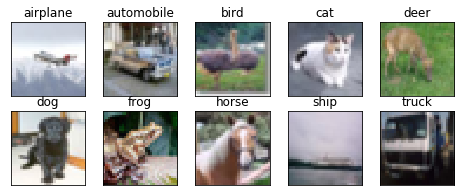

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

#RESULTS
Base Accuracy : 83.6% at 78th epoch <br><br>

Observation: <br>
Regularization techniques needs to be used to avoid overfitting in the model

 <br> <br>
Rewriting the model again with the following changes: <br>

Layers: <br>
Normal Convolution <br>
Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1)) <br>
Depthwise Separable Convolution <br>
Grouped Convolution (use 3x3, 5x5 only) <br>
Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2)  <br>

Normalization: <br>
a) Image Normalization <br>
b) Batch Normalization <br>

Regularization techniques: <br>
a) L2 Regularizer <br>
b) Dropout  <br>

Removed Dense layers  <br>

Trained the new model for 50 epochs. 

References:
1. https://github.com/amitdoda1983/EVA-Session-6/blob/master/6A_M6_Amit_Doda.ipynb
2. https://github.com/toniqapps/EVA-Assignment-6/blob/master/Assignment_6A.ipynb



###Image Normalization

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# standardizing the image cifar10 dataset

# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# report pixel means and standard deviations of train and test datasets
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=120.708 (64.150), test=121.529 (64.061)
(64, 32, 32, 3) 0.0008427662 0.9345755
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


In [0]:
# Reshape the input to have the dimension for channel
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy

In [0]:
# One - hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
from keras import regularizers
from keras.layers.convolutional import AveragePooling2D

In [0]:
# Define the model
model = Sequential()

model.add(Convolution2D(64, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, 1))

model.add(AveragePooling2D(pool_size = (4,4)))
model.add(Flatten())


model.add(Activation('softmax'))


W0809 05:48:17.843855 139658217412480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0809 05:48:17.848367 139658217412480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 05:48:17.860501 139658217412480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random

In [0]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

checkpointer = ModelCheckpoint(filepath='../content/drive/My Drive/EIP/model_assignment6A.h5', monitor='val_acc', mode='auto', verbose = 1, save_best_only=True)
lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.8, cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)



# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0809 05:48:21.348490 139658217412480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_24 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 128)       512       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app
W0808 13:47:17.941969 139880844322688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 54s 140ms/step - loss: 1.3705 - acc: 0.5269 - val_loss: 1.0835 - val_acc: 0.6448

Epoch 00001: val_acc improved from -inf to 0.64480, saving model to ../content/drive/My Drive/EIP/model_assignment6A.h5
Epoch 2/100
390/390 [==============================] - 50s 127ms/step - loss: 0.9513 - acc: 0.6823 - val_loss: 0.9741 - val_acc: 0.6815

Epoch 00002: val_acc improved from 0.64480 to 0.68150, saving model to ../content/drive/My Drive/EIP/model_assignment6A.h5
Epoch 3/100
390/390 [==============================] - 49s 127ms/step - loss: 0.7966 - acc: 0.7413 - val_loss: 0.7889 - val_acc: 0.7461

Epoch 00003: val_acc improved from 0.68150 to 0.74610, saving model to ../content/drive/My Drive/EIP/model_assignment6A.h5
Epoch 4/100
390/390 [==============================] - 50s 127ms/step - loss: 0.7067 - acc: 0.7775 - val_loss: 0.6678 - val_acc: 0.7991

Epoch 00004: val_acc improved from 0.74610 to 0.79910, saving model to ../content/drive/My Drive/E

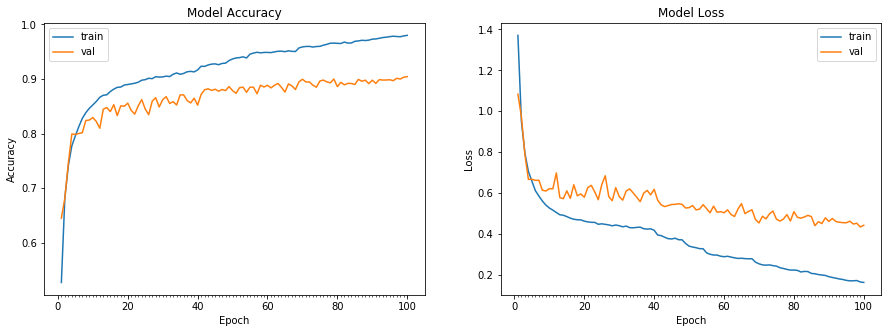

Accuracy on test data is: 90.43


In [0]:
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
EPOCHS = 100

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, horizontal_flip=True)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), callbacks=[checkpointer,lr_reducer], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model))

#Grad Cam without Cutout 

1. Gradient-weighted Class Activation Mapping (Grad-CAM), uses the gradients of any target concept (say logits for ‘dog’ or even a caption), flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept.<br></br> 
2. simply take the final convolutional feature map and then we weigh every channel in that feature with the gradient of the class with respect to the channel
3. "visualize feature maps with three dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image" - Deep Learning with Python book

In [0]:
# loading the saved model
from keras.models import load_model
model = load_model('../content/drive/My Drive/EIP/model_assignment6A.h5')
model.summary()  # As a reminder

W0809 05:49:03.026723 139658217412480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_24 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 128)       512       
__________

In [0]:
# Names of the layers
layer_names = []                                                          
for layer in model.layers[:36]:                                            
    layer_names.append(layer.name) 
    print(layer.name)

conv2d_25
activation_23
batch_normalization_13
dropout_24
conv2d_26
activation_24
batch_normalization_14
dropout_25
max_pooling2d_10
dropout_26
conv2d_27
conv2d_28
activation_25
batch_normalization_15
dropout_27
conv2d_29
activation_26
batch_normalization_16
dropout_28
max_pooling2d_11
dropout_29
conv2d_30
conv2d_31
activation_27
batch_normalization_17
dropout_30
conv2d_32
activation_28
batch_normalization_18
dropout_31
max_pooling2d_12
dropout_32
conv2d_33
average_pooling2d_3
flatten_4
activation_29


10


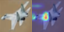

 
11


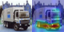

 
21


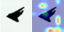

 
51


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


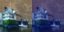

 
60


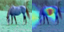

 
100


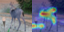

 
160


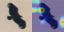

 
161


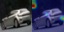

 
300


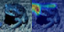

 
400


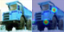

 
500


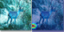

 
770


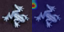

 
790


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


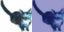

 
800


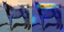

 
900


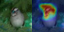

 
999


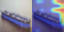

In [0]:
# get input image
import cv2
from google.colab.patches import cv2_imshow

# not part of the images the network was trained on
images = [10,11,21,51,60,100,160,161,300,400,500,770,790,800,900,999]
for j in images:
  x = testX[j]
  # required for loading and preprocessing our image
  x = np.expand_dims(x, axis=0)

  # Running the model in predict mode
  preds = model.predict(x,batch_size=1)

#  Here, in this case, let’s see the map for the top prediction
# we get the predictions for the image and then we take the topmost class index
  class_idx = np.argmax(preds[0])
  
  # Extracts the class output
  # compute map for any class
  class_output = model.output[:, class_idx]
  # take the output from the final before convolutional layer in the above model which is conv2d_32
  # The resulting feature map will be of shape 8×8×256.
  last_conv_layer = model.get_layer("conv2d_32")

  #  compute the gradient of the class output value with respect to the feature map
  # gradient with respect to the model’s conv2d_32 layer input
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  #  pool the gradients over all the axes leaving out the channel dimension 
  # Defining the loss tensor for filter visualization 
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

# compute the value of the loss tensor and the gradient tensor, given input images
# weigh the output feature map with the computed gradient values
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  '''iterate is a function that takes a Numpy tensor (as a list of tensors of size 1) and 
returns a list of two Numpy tensors: the loss value and the gradient value'''
  pooled_grads_value, conv_layer_output_value = iterate([x])

  #  define a Python loop to do stochastic gradient descent
  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  #  average the weighed feature map along the channel dimension resulting in a heat map of size 8 \times 8
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  # normalize the heat map to make the values in between 0 and 1
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # read the image
  img = (testX[j])
  # use OpenCV to resize the existing heatmap to the image size
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  # blend the original image and the heatmap to superimpose the heatmap on to the image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  #cv2_imshow(img)
  #cv2_imshow(superimposed_img)
  concatimg = cv2.hconcat([img,superimposed_img])
  # Display the concatenated test image
  print (j)
  #clearly visible where CNN is looking in the image to actually distinguish between the classes
  cv2_imshow(concatimg)
  cv2.waitKey(0)
  print (" ")
  j = j + 1


#Model with Cutout

In [0]:
# Define the model
model = Sequential()

model.add(Convolution2D(64, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, 1))

model.add(AveragePooling2D(pool_size = (4,4)))
model.add(Flatten())


model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regular

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 128)       512       
__________

In [0]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

checkpointer1 = ModelCheckpoint(filepath='../content/drive/My Drive/EIP/model_assignment9.h5', monitor='val_acc', mode='auto', verbose = 1, save_best_only=True)
lr_reducer1 = ReduceLROnPlateau(monitor='val_acc',factor=0.8, cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)



# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
# Reference : https://github.com/yu4u/cutout-random-erasing

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100
390/390 [==============================] - 27s 68ms/step - loss: 1.0875 - acc: 0.6353 - val_loss: 0.9752 - val_acc: 0.6816

Epoch 00001: val_acc improved from -inf to 0.68160, saving model to ../content/drive/My Drive/EIP/model_assignment9.h5
Epoch 2/100
390/390 [==============================] - 24s 63ms/step - loss: 0.9131 - acc: 0.7011 - val_loss: 0.8406 - val_acc: 0.7269

Epoch 00002: val_acc improved from 0.68160 to 0.72690, saving model to ../content/drive/My Drive/EIP/model_assignment9.h5
Epoch 3/100
390/390 [==============================] - 24s 61ms/step - loss: 0.8145 - acc: 0.7432 - val_loss: 0.8298 - val_acc: 0.7410

Epoch 00003: val_acc improved from 0.72690 to 0.74100, saving model to ../content/drive/My Drive/EIP/model_assignment9.h5
Epoch 4/100
390/390 [==============================] - 24s 62ms/step - loss: 0.7528 - acc: 0.7653 - val_loss: 0.7162 - val_acc: 0.7808

Epoch 00004: val_acc improved from 0.74100 to 0.78080, saving model to ../content/drive/My Dr

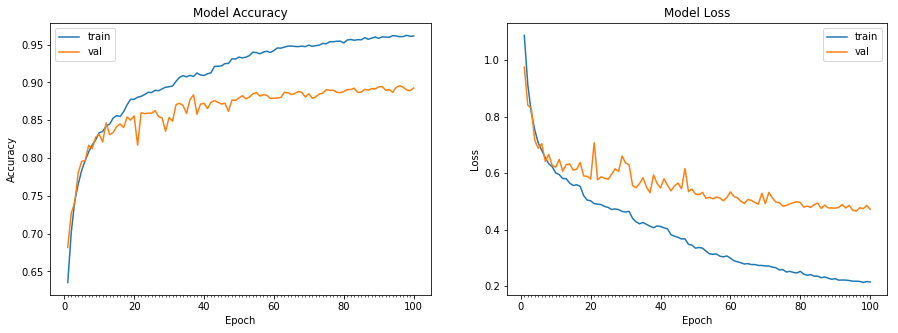

Accuracy on test data is: 89.26


In [38]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), callbacks=[checkpointer1,lr_reducer1],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model))

In [0]:
# Load Model
model=keras.models.load_model('../content/drive/My Drive/EIP/model_assignment9.h5')

In [40]:
score = model.evaluate(X_test, Y_test, batch_size=128)
print (score[1])

10000/10000 [==============================] - 2s 199us/step
0.8956


#GradCam with Cutout

10


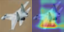

 
11


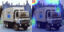

 
21


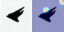

 
51


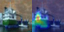

 
60


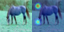

 
100


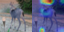

 
160


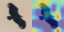

 
161


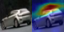

 
300


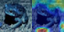

 
400


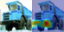

 
500


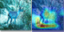

 
770


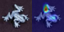

 
790


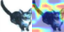

 
800


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


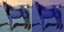

 
900


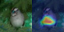

 
999


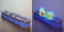

In [43]:
import cv2
from google.colab.patches import cv2_imshow

images = [10,11,21,51,60,100,160,161,300,400,500,770,790,800,900,999]
for j in images:
  x = testX[j]
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x,batch_size=1)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_17")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap) 
  img = (testX[j])
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  #cv2_imshow(img)
  #cv2_imshow(superimposed_img)
  concatimg = cv2.hconcat([img,superimposed_img])
  # Display the concatenated image
  print (j)
  cv2_imshow(concatimg)
  cv2.waitKey(0)
  print (" ")
  j = j + 1


#Observations :

I have trained 2 models below, one without cutout , one with cutout
Below both model results can be found
Validation Accuarcy with cutout is 89.56%
